## Task:- To analyse a portfolio of stocks to provide consultation on investment management based on client’s requirement.

#### Our task is to provide consultation to two different investors, Mr Patrick Jyenger and Mr Peter Jyenger based on their requirements and financial objectives.

### Preliminary Steps :- 
- Data loading
- Data Exploration
- Stock Analysis and Portfolio Management
- Reporting

In [1]:
# importing important libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 900)
pd.set_option('display.max_info_columns',500)

In [2]:
# load files as dataframe
sp500 = pd.read_csv("D:\Documents\capstone project\Dataset\S&P500.csv")
sp500['Ticker'] = 'SP500'

aal = pd.read_csv("D:\Documents\capstone project\Dataset\Aviation\AAL.csv")
aal['Ticker'] = 'AAL'

algt = pd.read_csv("D:\Documents\capstone project\Dataset\Aviation\ALGT.csv")
algt['Ticker'] = 'ALGT'

alk = pd.read_csv("D:\Documents\capstone project\Dataset\Aviation\ALK.csv")
alk['Ticker'] = 'ALK'

dal = pd.read_csv("D:\Documents\capstone project\Dataset\Aviation\DAL.csv")
dal['Ticker'] = 'DAL'

ha = pd.read_csv("D:\Documents\capstone project\Dataset\Aviation\HA.csv")
ha['Ticker'] = 'HA'

luv = pd.read_csv("D:\Documents\capstone project\Dataset\Aviation\LUV.csv")
luv['Ticker'] = 'LUV'

bcs = pd.read_csv("D:\Documents\capstone project\Dataset\Finance\BCS.csv")
bcs['Ticker'] = 'BCS'

cs = pd.read_csv("D:\Documents\capstone project\Dataset\Finance\CS.csv")
cs['Ticker'] = 'CS'

db = pd.read_csv("D:\Documents\capstone project\Dataset\Finance\DB.csv")
db['Ticker'] = 'DB'

gs = pd.read_csv("D:\Documents\capstone project\Dataset\Finance\GS.csv")
gs['Ticker'] = 'GS'

ms = pd.read_csv("D:\Documents\capstone project\Dataset\Finance\MS.csv")
ms['Ticker'] = 'MS'

wfc = pd.read_csv("D:\Documents\capstone project\Dataset\Finance\WFC.csv")
wfc['Ticker'] = 'WFC'

bhc = pd.read_csv("D:\Documents\capstone project\Dataset\Pharma_Healthcare\BHC.csv")
bhc['Ticker'] = 'BHC'

jnj = pd.read_csv("D:\Documents\capstone project\Dataset\Pharma_Healthcare\JNJ.csv")
jnj['Ticker'] = 'JNJ'

mrk = pd.read_csv("D:\Documents\capstone project\Dataset\Pharma_Healthcare\MRK.csv")
mrk['Ticker'] = 'MRK'

pfe = pd.read_csv("D:\Documents\capstone project\Dataset\Pharma_Healthcare\PFE.csv")
pfe['Ticker'] = 'PFE'

rhhby = pd.read_csv("D:\Documents\capstone project\Dataset\Pharma_Healthcare\RHHBY.csv")
rhhby['Ticker'] = 'RHHBY'

unh = pd.read_csv("D:/Documents/capstone project/Dataset/Pharma_Healthcare/UNH.csv")
unh['Ticker'] = 'UNH'

aapl = pd.read_csv("D:/Documents/capstone project/Dataset/Technology/AAPL.csv")
aapl['Ticker'] = 'AAPL'

amzn = pd.read_csv("D:/Documents/capstone project/Dataset/Technology/AMZN.csv")
amzn['Ticker'] = 'AMZN'

fb = pd.read_csv("D:/Documents/capstone project/Dataset/Technology/FB.csv")
fb['Ticker'] = 'FB'

goog = pd.read_csv("D:/Documents/capstone project/Dataset/Technology/GOOG.csv")
goog['Ticker'] = 'GOOG'

ibm = pd.read_csv("D:/Documents/capstone project/Dataset/Technology/IBM.csv")
ibm['Ticker'] = 'IBM'

msft = pd.read_csv("D:/Documents/capstone project/Dataset/Technology/MSFT.csv")
msft['Ticker'] = 'MSFT'

In [3]:
# concat all dataframes to a single df(stock)
all_df = [sp500,aal,algt,alk,dal,ha,luv,bcs,cs,db,gs,ms,wfc,bhc,jnj,mrk,pfe,rhhby,unh,aapl,amzn,fb,goog,ibm,msft]
stock = pd.concat(all_df)
stock.head()

Date         Open         High          Low        Close  \
0  01-10-2010  1143.489990  1150.300049  1139.420044  1146.239990   
1  04-10-2010  1144.959961  1148.160034  1131.869995  1137.030029   
2  05-10-2010  1140.680054  1162.760010  1140.680054  1160.750000   
3  06-10-2010  1159.810059  1162.329956  1154.849976  1159.969971   
4  07-10-2010  1161.569946  1163.869995  1151.410034  1158.060059   

     Adj Close        Volume Ticker  
0  1146.239990  4.298910e+09  SP500  
1  1137.030029  3.604110e+09  SP500  
2  1160.750000  4.068840e+09  SP500  
3  1159.969971  4.073160e+09  SP500  
4  1158.060059  3.910550e+09  SP500

In [4]:
# checking for null values
round(100*(stock.isnull().sum()/len(stock)), 2)

Date         0.25
Open         0.25
High         0.25
Low          0.25
Close        0.25
Adj Close    0.25
Volume       0.25
Ticker       0.00
dtype: float64

In [5]:
# visualizing the rows with null values
stock[stock.isnull().any(axis=1)]

Date  Open  High  Low  Close  Adj Close  Volume Ticker
2517  NaN   NaN   NaN  NaN    NaN        NaN     NaN   ALGT
2518  NaN   NaN   NaN  NaN    NaN        NaN     NaN   ALGT
2519  NaN   NaN   NaN  NaN    NaN        NaN     NaN   ALGT
2520  NaN   NaN   NaN  NaN    NaN        NaN     NaN   ALGT
2521  NaN   NaN   NaN  NaN    NaN        NaN     NaN   ALGT
2522  NaN   NaN   NaN  NaN    NaN        NaN     NaN   ALGT
2523  NaN   NaN   NaN  NaN    NaN        NaN     NaN   ALGT
2517  NaN   NaN   NaN  NaN    NaN        NaN     NaN    ALK
2518  NaN   NaN   NaN  NaN    NaN        NaN     NaN    ALK
2519  NaN   NaN   NaN  NaN    NaN        NaN     NaN    ALK
2520  NaN   NaN   NaN  NaN    NaN        NaN     NaN    ALK
2521  NaN   NaN   NaN  NaN    NaN        NaN     NaN    ALK
2522  NaN   NaN   NaN  NaN    NaN        NaN     NaN    ALK
2523  NaN   NaN   NaN  NaN    NaN        NaN     NaN    ALK
2517  NaN   NaN   NaN  NaN    NaN        NaN     NaN    DAL
2518  NaN   NaN   NaN  NaN    NaN        NaN     NaN    DAL
2519  NaN   NaN   NaN  NaN    NaN        NaN     NaN    DAL
2520  NaN   NaN   NaN  NaN    NaN        NaN     NaN    DAL
2521  NaN   NaN   NaN  NaN    NaN        NaN     NaN    DAL
2522  NaN   NaN   NaN  NaN    NaN        NaN     NaN    DAL
2523  NaN   NaN   NaN  NaN    NaN        NaN     NaN    DAL
2517  NaN   NaN   NaN  NaN    NaN        NaN     NaN     HA
2518  NaN   NaN   NaN  NaN    NaN        NaN     NaN     HA
2519  NaN   NaN   NaN  NaN    NaN        NaN     NaN     HA
2520  NaN   NaN   NaN  NaN    NaN        NaN     NaN     HA
2521  NaN   NaN   NaN  NaN    NaN        NaN     NaN     HA
2522  NaN   NaN   NaN  NaN    NaN        NaN     NaN     HA
2523  NaN   NaN   NaN  NaN    NaN        NaN     NaN     HA
2517  NaN   NaN   NaN  NaN    NaN        NaN     NaN    LUV
2518  NaN   NaN   NaN  NaN    NaN        NaN     NaN    LUV
2519  NaN   NaN   NaN  NaN    NaN        NaN     NaN    LUV
2520  NaN   NaN   NaN  NaN    NaN        NaN     NaN    LUV
2521  NaN   NaN   NaN  NaN    NaN        NaN     NaN    LUV
2522  NaN   NaN   NaN  NaN    NaN        NaN     NaN    LUV
2523  NaN   NaN   NaN  NaN    NaN        NaN     NaN    LUV
2705  NaN   NaN   NaN  NaN    NaN        NaN     NaN    BCS
2706  NaN   NaN   NaN  NaN    NaN        NaN     NaN    BCS
2707  NaN   NaN   NaN  NaN    NaN        NaN     NaN    BCS
2708  NaN   NaN   NaN  NaN    NaN        NaN     NaN    BCS
2709  NaN   NaN   NaN  NaN    NaN        NaN     NaN    BCS
2710  NaN   NaN   NaN  NaN    NaN        NaN     NaN    BCS
2711  NaN   NaN   NaN  NaN    NaN        NaN     NaN    BCS
2705  NaN   NaN   NaN  NaN    NaN        NaN     NaN     CS
2706  NaN   NaN   NaN  NaN    NaN        NaN     NaN     CS
2707  NaN   NaN   NaN  NaN    NaN        NaN     NaN     CS
2708  NaN   NaN   NaN  NaN    NaN        NaN     NaN     CS
2709  NaN   NaN   NaN  NaN    NaN        NaN     NaN     CS
2710  NaN   NaN   NaN  NaN    NaN        NaN     NaN     CS
2711  NaN   NaN   NaN  NaN    NaN        NaN     NaN     CS
2705  NaN   NaN   NaN  NaN    NaN        NaN     NaN     DB
2706  NaN   NaN   NaN  NaN    NaN        NaN     NaN     DB
2707  NaN   NaN   NaN  NaN    NaN        NaN     NaN     DB
2708  NaN   NaN   NaN  NaN    NaN        NaN     NaN     DB
2709  NaN   NaN   NaN  NaN    NaN        NaN     NaN     DB
2710  NaN   NaN   NaN  NaN    NaN        NaN     NaN     DB
2711  NaN   NaN   NaN  NaN    NaN        NaN     NaN     DB
2705  NaN   NaN   NaN  NaN    NaN        NaN     NaN     GS
2706  NaN   NaN   NaN  NaN    NaN        NaN     NaN     GS
2707  NaN   NaN   NaN  NaN    NaN        NaN     NaN     GS
2708  NaN   NaN   NaN  NaN    NaN        NaN     NaN     GS
2709  NaN   NaN   NaN  NaN    NaN        NaN     NaN     GS
2710  NaN   NaN   NaN  NaN    NaN        NaN     NaN     GS
2711  NaN   NaN   NaN  NaN    NaN        NaN     NaN     GS
2705  NaN   NaN   NaN  NaN    NaN        NaN     NaN     MS
2706  NaN   NaN   NaN  NaN    NaN        NaN     NaN     MS
2707  NaN   NaN   NaN  NaN    NaN        NaN 

Here we see that null can be dropped because of not having any importance in data frame

In [6]:
# dropping rows with missing values
stock=stock.dropna()

In [7]:
# rechecking missing values in df
round(100*(stock.isnull().sum()/len(stock)), 2)

Date         0.0
Open         0.0
High         0.0
Low          0.0
Close        0.0
Adj Close    0.0
Volume       0.0
Ticker       0.0
dtype: float64

In [8]:
# setting Date column to datetime format
stock[['Day','Month','Year']] = stock.Date.str.split("-",expand=True,)
stock['Date'] = stock[['Year', 'Day','Month']].agg(''.join, axis=1)
stock['Date'] = pd.to_datetime(stock['Date'], format='%Y%d%m')

In [9]:
# selecting last five years data as df to work with
stock = stock.loc[(stock['Date'] >= '2015-10-01')]

In [10]:
print(stock['Date'].min())

2015-10-01 00:00:00


In [11]:
stock.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 31475 entries, 1258 to 2516
Data columns (total 11 columns):
Date         31475 non-null datetime64[ns]
Open         31475 non-null float64
High         31475 non-null float64
Low          31475 non-null float64
Close        31475 non-null float64
Adj Close    31475 non-null float64
Volume       31475 non-null float64
Ticker       31475 non-null object
Day          31475 non-null object
Month        31475 non-null object
Year         31475 non-null object
dtypes: datetime64[ns](1), float64(6), object(4)
memory usage: 2.9+ MB


In [12]:
# Set stock df's index column to Date
stock=stock.set_index('Date')

In [13]:
stock.head()

Open         High          Low        Close    Adj Close  \
Date                                                                          
2015-10-01  1919.650024  1927.209961  1900.699951  1923.819946  1923.819946   
2015-10-02  1921.770020  1951.359985  1893.699951  1951.359985  1951.359985   
2015-10-05  1954.329956  1989.170044  1954.329956  1987.050049  1987.050049   
2015-10-06  1986.630005  1991.619995  1971.989990  1979.920044  1979.920044   
2015-10-07  1982.339966  1999.310059  1976.439941  1995.829956  1995.829956   

                  Volume Ticker Day Month  Year  
Date                                             
2015-10-01  3.983600e+09  SP500  01    10  2015  
2015-10-02  4.378570e+09  SP500  02    10  2015  
2015-10-05  4.334490e+09  SP500  05    10  2015  
2015-10-06  4.202400e+09  SP500  06    10  2015  
2015-10-07  4.666470e+09  SP500  07    10  2015

### Creating single df with close stock price 

In [14]:
# Creating df(aal) with index as date and Stock Close Price as column 
aal = stock.loc[stock['Ticker'] == 'AAL'][['Close']]
# Changing close price column name to that of its Ticker
aal.columns = ['AAL']

# Creating df(algt) with index as date and Stock Close Price as column
algt = stock.loc[stock['Ticker'] == 'ALGT'][['Close']]
# Changing close price column name to that of its Ticker
algt.columns = ['ALGT']

# Creating df(alk) with index as date and Stock Close Price as column
alk = stock.loc[stock['Ticker'] == 'ALK'][['Close']]
# Changing close price column name to that of its Ticker
alk.columns = ['ALK']

# Creating df(dal) with index as date and Stock Close Price as column
dal = stock.loc[stock['Ticker'] == 'DAL'][['Close']]
# Changing close price column name to that of its Ticker
dal.columns = ['DAL']

# Creating df(ha) with index as date and Stock Close Price as column
ha = stock.loc[stock['Ticker'] == 'HA'][['Close']]
# Changing close price column name to that of its Ticker
ha.columns = ['HA']

# Creating df(luv) with index as date and Stock Close Price as column
luv = stock.loc[stock['Ticker'] == 'LUV'][['Close']]
# Changing close price column name to that of its Ticker
luv.columns = ['LUV']

# Creating df(bcs) with index as date and Stock Close Price as column
bcs = stock.loc[stock['Ticker'] == 'BCS'][['Close']]
# Changing close price column name to that of its Ticker
bcs.columns = ['BCS']

# Creating df(cs) with index as date and Stock Close Price as column
cs = stock.loc[stock['Ticker'] == 'CS'][['Close']]
# Changing close price column name to that of its Ticker
cs.columns = ['CS']

# Creating df(db) with index as date and Stock Close Price as column
db = stock.loc[stock['Ticker'] == 'DB'][['Close']]
# Changing close price column name to that of its Ticker
db.columns = ['DB']

# Creating df(gs) with index as date and Stock Close Price as column
gs = stock.loc[stock['Ticker'] == 'GS'][['Close']]
# Changing close price column name to that of its Ticker
gs.columns = ['GS']

# Creating df(ms) with index as date and Stock Close Price as column
ms = stock.loc[stock['Ticker'] == 'MS'][['Close']]
# Changing close price column name to that of its Ticker
ms.columns = ['MS']

# Creating df(wfc) with index as date and Stock Close Price as column
wfc = stock.loc[stock['Ticker'] == 'WFC'][['Close']]
# Changing close price column name to that of its Ticker
wfc.columns = ['WFC']

# Creating df(bhc) with index as date and Stock Close Price as column
bhc = stock.loc[stock['Ticker'] == 'BHC'][['Close']]
# Changing close price column name to that of its Ticker
bhc.columns = ['BHC']

# Creating df(jnj) with index as date and Stock Close Price as column
jnj = stock.loc[stock['Ticker'] == 'JNJ'][['Close']]
# Changing close price column name to that of its Ticker
jnj.columns = ['JNJ']

# Creating df(mrk) with index as date and Stock Close Price as column
mrk = stock.loc[stock['Ticker'] == 'MRK'][['Close']]
# Changing close price column name to that of its Ticker
mrk.columns = ['MRK']

# Creating df(pfe) with index as date and Stock Close Price as column
pfe = stock.loc[stock['Ticker'] == 'PFE'][['Close']]
# Changing close price column name to that of its Ticker
pfe.columns = ['PFE']

# Creating df(rhhby) with index as date and Stock Close Price as column
rhhby = stock.loc[stock['Ticker'] == 'RHHBY'][['Close']]
# Changing close price column name to that of its Ticker
rhhby.columns = ['RHHBY']

# Creating df(unh) with index as date and Stock Close Price as column
unh = stock.loc[stock['Ticker'] == 'UNH'][['Close']]
# Changing close price column name to that of its Ticker
unh.columns = ['UNH']

# Creating df(aapl) with index as date and Stock Close Price as column
aapl = stock.loc[stock['Ticker'] == 'AAPL'][['Close']]
# Changing close price column name to that of its Ticker
aapl.columns = ['AAPL']

# Creating df(amzn) with index as date and Stock Close Price as column
amzn = stock.loc[stock['Ticker'] == 'AMZN'][['Close']]
# Changing close price column name to that of its Ticker
amzn.columns = ['AMZN']

# Creating df(fb) with index as date and Stock Close Price as column
fb = stock.loc[stock['Ticker'] == 'FB'][['Close']]
# Changing close price column name to that of its Ticker
fb.columns = ['FB']

# Creating df(goog) with index as date and Stock Close Price as column
goog = stock.loc[stock['Ticker'] == 'GOOG'][['Close']]
# Changing close price column name to that of its Ticker
goog.columns = ['GOOG']

# Creating df(ibm) with index as date and Stock Close Price as column
ibm = stock.loc[stock['Ticker'] == 'IBM'][['Close']]
# Changing close price column name to that of its Ticker
ibm.columns = ['IBM']

# Creating df(msft) with index as date and Stock Close Price as column
msft = stock.loc[stock['Ticker'] == 'MSFT'][['Close']]
# Changing close price column name to that of its Ticker
msft.columns = ['MSFT']

# Creating df(sp500) with index as date and Stock Close Price as column
sp500 = stock.loc[stock['Ticker'] == 'SP500'][['Close']]
# Changing close price column name to that of its Ticker
sp500.columns = ['SP500']

In [52]:
# Creating single dataframe with column as Tickers and rows as stock close price and index as date
cp_df1 = pd.concat([aal,algt,alk,dal,ha,luv,bcs,cs,db,gs,ms,wfc,bhc,jnj,mrk,pfe,rhhby,unh,aapl,amzn,fb,goog,ibm,msft,sp500], axis=1)
final_dataset = cp_df1.copy()
final_dataset

AAL        ALGT        ALK        DAL         HA        LUV  \
Date                                                                            
2015-10-01  39.200001  217.979996  80.230003  45.410000  24.730000  38.410000   
2015-10-02  38.630001  215.589996  79.260002  44.869999  24.280001  38.380001   
2015-10-05  40.189999  216.059998  80.910004  46.959999  25.500000  39.299999   
2015-10-06  38.130001  208.600006  74.529999  45.090000  24.250000  38.000000   
2015-10-07  39.310001  213.839996  75.970001  45.990002  24.559999  38.709999   
...               ...         ...        ...        ...        ...        ...   
2020-09-24  11.770000  121.500000  35.700001  29.010000  12.400000  36.860001   
2020-09-25  12.290000  123.760002  36.700001  29.780001  12.800000  37.099998   
2020-09-28  12.760000  127.110001  37.540001  31.340000  13.380000  38.240002   
2020-09-29  12.250000  121.089996  36.669998  30.610001  12.860000  37.610001   
2020-09-30  12.290000  119.800003  36.630001  30.580000  12.890000  37.500000   

              BCS         CS         DB          GS         MS        WFC  \
Date                                                                        
2015-10-01  15.01  24.090000  26.520000  176.020004  31.500000  51.439999   
2015-10-02  15.39  24.639999  27.139999  177.009995  31.430000  51.259998   
2015-10-05  15.60  25.160000  28.200001  180.699997  32.290001  52.410000   
2015-10-06  15.55  25.379999  28.400000  180.320007  32.360001  52.029999   
2015-10-07  15.73  25.320000  28.790001  182.229996  32.930000  52.189999   
...           ...        ...        ...         ...        ...        ...   
2020-09-24   4.75   9.620000   8.110000  195.110001  46.610001  23.320000   
2020-09-25   4.70   9.480000   8.000000  194.949997  47.040001  23.639999   
2020-09-28   4.99   9.900000   8.430000  199.070007  48.380001  23.820000   
2020-09-29   4.96   9.830000   8.270000  196.789993  47.240002  23.260000   
2020-09-30   5.01   9.970000   8.400000  200.970001  48.349998  23.510000   

                   BHC         JNJ        MRK        PFE      RHHBY  \
Date                                                                  
2015-10-01  179.600006   93.169998  49.369999  31.840000  33.220001   
2015-10-02  182.320007   93.930000  50.139999  33.080002  33.320000   
2015-10-05  163.460007   94.760002  51.230000  33.480000  33.439999   
2015-10-06  166.000000   93.419998  49.799999  32.790001  33.529999   
2015-10-07  169.830002   94.980003  50.950001  33.290001  32.549999   
...                ...         ...        ...        ...        ...   
2020-09-24   15.220000  144.669998  83.150002  35.759998  44.700001   
2020-09-25   15.300000  145.660004  82.930000  36.049999  44.820000   
2020-09-28   15.270000  147.110001  82.760002  36.389999  44.110001   
2020-09-29   14.880000  147.059998  81.900002  36.169998  43.369999   
2020-09-30   15.540000  148.880005  82.949997  36.700001  42.810001   

                   UNH        AAPL         AMZN          FB         GOOG  \
Date                                                                       
2015-10-01  116.610001   27.395000   520.719971   90.949997   611.289978   
2015-10-02  118.830002   27.594999   532.539978   92.070000   626.909973   
2015-10-05  119.650002   27.695000   543.679993   94.010002   641.469971   
2015-10-06  116.050003   27.827499   537.479980   92.800003   645.440002   
2015-10-07  116.430000   27.695000   541.940002   92.400002   642.359985   
...                ...         ...          ...         ...          ...   
2020-09-24  292.660004  108.220001  3019.790039  249.529999  1428.290039   
2020-09-25  302.500000  112.279999  3095.129883  254.820007  1444.959961   
2020-09-28  303.230011  114.959999  3174.050049  256.820007  1464.520020   
2020-09-29  304.149994  114.089996  3144.879883  261.790009  1469.329956   
2020-09-30  311.769989  115.809998  3148.729980  261.899994  1469.599976   

                   IBM        MSFT        SP500  

In [53]:
# importing our final data set to excel
final_dataset.to_excel('final_dataset.xlsx')

In [16]:
# creating copy of original df(cp_df1)
cp_df = cp_df1.copy()
cp_df.head()

AAL        ALGT        ALK        DAL         HA        LUV  \
Date                                                                            
2015-10-01  39.200001  217.979996  80.230003  45.410000  24.730000  38.410000   
2015-10-02  38.630001  215.589996  79.260002  44.869999  24.280001  38.380001   
2015-10-05  40.189999  216.059998  80.910004  46.959999  25.500000  39.299999   
2015-10-06  38.130001  208.600006  74.529999  45.090000  24.250000  38.000000   
2015-10-07  39.310001  213.839996  75.970001  45.990002  24.559999  38.709999   

              BCS         CS         DB          GS         MS        WFC  \
Date                                                                        
2015-10-01  15.01  24.090000  26.520000  176.020004  31.500000  51.439999   
2015-10-02  15.39  24.639999  27.139999  177.009995  31.430000  51.259998   
2015-10-05  15.60  25.160000  28.200001  180.699997  32.290001  52.410000   
2015-10-06  15.55  25.379999  28.400000  180.320007  32.360001  52.029999   
2015-10-07  15.73  25.320000  28.790001  182.229996  32.930000  52.189999   

                   BHC        JNJ        MRK        PFE      RHHBY  \
Date                                                                 
2015-10-01  179.600006  93.169998  49.369999  31.840000  33.220001   
2015-10-02  182.320007  93.930000  50.139999  33.080002  33.320000   
2015-10-05  163.460007  94.760002  51.230000  33.480000  33.439999   
2015-10-06  166.000000  93.419998  49.799999  32.790001  33.529999   
2015-10-07  169.830002  94.980003  50.950001  33.290001  32.549999   

                   UNH       AAPL        AMZN         FB        GOOG  \
Date                                                                   
2015-10-01  116.610001  27.395000  520.719971  90.949997  611.289978   
2015-10-02  118.830002  27.594999  532.539978  92.070000  626.909973   
2015-10-05  119.650002  27.695000  543.679993  94.010002  641.469971   
2015-10-06  116.050003  27.827499  537.479980  92.800003  645.440002   
2015-10-07  116.430000  27.695000  541.940002  92.400002  642.359985   

                   IBM       MSFT        SP500  
Date                                            
2015-10-01  143.589996  44.610001  1923.819946  
2015-10-02  144.580002  45.570000  1951.359985  
2015-10-05  149.039993  46.630001  1987.050049  
2015-10-06  148.779999  46.750000  1979.920044  
2015-10-07  150.089996  46.799999  1995.829956

In [17]:
# creating relation column with stock close price of each ticker to that of SP500
cp_df['Rel_AAL'] = cp_df['AAL']/cp_df['SP500']
cp_df['Rel_ALGT'] = cp_df['ALGT']/cp_df['SP500']
cp_df['Rel_ALK'] = cp_df['ALK']/cp_df['SP500']
cp_df['Rel_DAL'] = cp_df['DAL']/cp_df['SP500']
cp_df['Rel_HA'] = cp_df['HA']/cp_df['SP500']
cp_df['Rel_LUV'] = cp_df['LUV']/cp_df['SP500']
cp_df['Rel_BCS'] = cp_df['BCS']/cp_df['SP500']
cp_df['Rel_CS'] = cp_df['CS']/cp_df['SP500']
cp_df['Rel_DB'] = cp_df['DB']/cp_df['SP500']
cp_df['Rel_GS'] = cp_df['GS']/cp_df['SP500']
cp_df['Rel_MS'] = cp_df['MS']/cp_df['SP500']
cp_df['Rel_WFC'] = cp_df['WFC']/cp_df['SP500']
cp_df['Rel_BHC'] = cp_df['BHC']/cp_df['SP500']
cp_df['Rel_JNJ'] = cp_df['JNJ']/cp_df['SP500']
cp_df['Rel_MRK'] = cp_df['MRK']/cp_df['SP500']
cp_df['Rel_PFE'] = cp_df['PFE']/cp_df['SP500']
cp_df['Rel_RHHBY'] = cp_df['RHHBY']/cp_df['SP500']
cp_df['Rel_UNH'] = cp_df['UNH']/cp_df['SP500']
cp_df['Rel_AAPL'] = cp_df['AAPL']/cp_df['SP500']
cp_df['Rel_AMZN'] = cp_df['AMZN']/cp_df['SP500']
cp_df['Rel_FB'] = cp_df['FB']/cp_df['SP500']
cp_df['Rel_GOOG'] = cp_df['GOOG']/cp_df['SP500']
cp_df['Rel_IBM'] = cp_df['IBM']/cp_df['SP500']
cp_df['Rel_MSFT'] = cp_df['MSFT']/cp_df['SP500']
cp_df.head()

AAL        ALGT        ALK        DAL         HA        LUV  \
Date                                                                            
2015-10-01  39.200001  217.979996  80.230003  45.410000  24.730000  38.410000   
2015-10-02  38.630001  215.589996  79.260002  44.869999  24.280001  38.380001   
2015-10-05  40.189999  216.059998  80.910004  46.959999  25.500000  39.299999   
2015-10-06  38.130001  208.600006  74.529999  45.090000  24.250000  38.000000   
2015-10-07  39.310001  213.839996  75.970001  45.990002  24.559999  38.709999   

              BCS         CS         DB          GS         MS        WFC  \
Date                                                                        
2015-10-01  15.01  24.090000  26.520000  176.020004  31.500000  51.439999   
2015-10-02  15.39  24.639999  27.139999  177.009995  31.430000  51.259998   
2015-10-05  15.60  25.160000  28.200001  180.699997  32.290001  52.410000   
2015-10-06  15.55  25.379999  28.400000  180.320007  32.360001  52.029999   
2015-10-07  15.73  25.320000  28.790001  182.229996  32.930000  52.189999   

                   BHC        JNJ        MRK        PFE      RHHBY  \
Date                                                                 
2015-10-01  179.600006  93.169998  49.369999  31.840000  33.220001   
2015-10-02  182.320007  93.930000  50.139999  33.080002  33.320000   
2015-10-05  163.460007  94.760002  51.230000  33.480000  33.439999   
2015-10-06  166.000000  93.419998  49.799999  32.790001  33.529999   
2015-10-07  169.830002  94.980003  50.950001  33.290001  32.549999   

                   UNH       AAPL        AMZN         FB        GOOG  \
Date                                                                   
2015-10-01  116.610001  27.395000  520.719971  90.949997  611.289978   
2015-10-02  118.830002  27.594999  532.539978  92.070000  626.909973   
2015-10-05  119.650002  27.695000  543.679993  94.010002  641.469971   
2015-10-06  116.050003  27.827499  537.479980  92.800003  645.440002   
2015-10-07  116.430000  27.695000  541.940002  92.400002  642.359985   

                   IBM       MSFT        SP500   Rel_AAL  Rel_ALGT   Rel_ALK  \
Date                                                                           
2015-10-01  143.589996  44.610001  1923.819946  0.020376  0.113306  0.041703   
2015-10-02  144.580002  45.570000  1951.359985  0.019796  0.110482  0.040618   
2015-10-05  149.039993  46.630001  1987.050049  0.020226  0.108734  0.040719   
2015-10-06  148.779999  46.750000  1979.920044  0.019258  0.105358  0.037643   
2015-10-07  150.089996  46.799999  1995.829956  0.019696  0.107143  0.038064   

             Rel_DAL    Rel_HA   Rel_LUV   Rel_BCS    Rel_CS    Rel_DB  \
Date                                                                     
2015-10-01  0.023604  0.012855  0.019965  0.007802  0.012522  0.013785   
2015-10-02  0.022994  0.012443  0.019668  0.007887  0.012627  0.013908   
2015-10-05  0.023633  0.012833  0.019778  0.007851  0.012662  0.014192   
2015-10-06  0.022774  0.012248  0.019193  0.007854  0.012819  0.014344   
2015-10-07  0.023043  0.012306  0.019395  0.007881  0.012686  0.014425   

              Rel_GS    Rel_MS   Rel_WFC   Rel_BHC   Rel_JNJ   Rel_MRK  \
Date                                                                     
2015-10-01  0.091495  0.016374  0.026738  0.093356  0.048430  0.025662   
2015-10-02  0.090711  0.016107  0.026269  0.093432  0.048136  0.025695   
2015-10-05  0.090939  0.016250  0.026376  0.082263  0.047689  0.025782   
2015-10-06  0.091074  0.016344  0.026279  0.083842  0.047184  0.025153   
2015-10-07  0.091305  0.016499  0.026150  0.085092  0.047589  0.025528   

             Rel_PFE  Rel_RHHBY   Rel_UNH  Rel_AAPL  Rel_AMZN    Rel_FB  \
Date                                                                      
2015-10-01  0.016550   0.017268  0.060614  0.014240  0.270670  0.047276   
2015-10-02  0.016952   0.017075  0.060896  0.014141  0.272907  0.047182   
2015-10-05  0.0

In [18]:
# creating new df with relation values columns of cp_df
rel = cp_df[['Rel_AAL','Rel_ALGT','Rel_ALK','Rel_DAL','Rel_HA','Rel_LUV','Rel_BCS','Rel_CS','Rel_DB','Rel_GS','Rel_MS','Rel_WFC','Rel_BHC','Rel_JNJ','Rel_MRK','Rel_PFE','Rel_RHHBY','Rel_UNH','Rel_AAPL','Rel_AMZN','Rel_FB','Rel_GOOG','Rel_IBM','Rel_MSFT']]
rel.head()

Rel_AAL  Rel_ALGT   Rel_ALK   Rel_DAL    Rel_HA   Rel_LUV  \
Date                                                                     
2015-10-01  0.020376  0.113306  0.041703  0.023604  0.012855  0.019965   
2015-10-02  0.019796  0.110482  0.040618  0.022994  0.012443  0.019668   
2015-10-05  0.020226  0.108734  0.040719  0.023633  0.012833  0.019778   
2015-10-06  0.019258  0.105358  0.037643  0.022774  0.012248  0.019193   
2015-10-07  0.019696  0.107143  0.038064  0.023043  0.012306  0.019395   

             Rel_BCS    Rel_CS    Rel_DB    Rel_GS    Rel_MS   Rel_WFC  \
Date                                                                     
2015-10-01  0.007802  0.012522  0.013785  0.091495  0.016374  0.026738   
2015-10-02  0.007887  0.012627  0.013908  0.090711  0.016107  0.026269   
2015-10-05  0.007851  0.012662  0.014192  0.090939  0.016250  0.026376   
2015-10-06  0.007854  0.012819  0.014344  0.091074  0.016344  0.026279   
2015-10-07  0.007881  0.012686  0.014425  0.091305  0.016499  0.026150   

             Rel_BHC   Rel_JNJ   Rel_MRK   Rel_PFE  Rel_RHHBY   Rel_UNH  \
Date                                                                      
2015-10-01  0.093356  0.048430  0.025662  0.016550   0.017268  0.060614   
2015-10-02  0.093432  0.048136  0.025695  0.016952   0.017075  0.060896   
2015-10-05  0.082263  0.047689  0.025782  0.016849   0.016829  0.060215   
2015-10-06  0.083842  0.047184  0.025153  0.016561   0.016935  0.058613   
2015-10-07  0.085092  0.047589  0.025528  0.016680   0.016309  0.058337   

            Rel_AAPL  Rel_AMZN    Rel_FB  Rel_GOOG   Rel_IBM  Rel_MSFT  
Date                                                                    
2015-10-01  0.014240  0.270670  0.047276  0.317748  0.074638  0.023188  
2015-10-02  0.014141  0.272907  0.047182  0.321268  0.074092  0.023353  
2015-10-05  0.013938  0.273612  0.047311  0.322825  0.075006  0.023467  
2015-10-06  0.014055  0.271465  0.046871  0.325993  0.075144  0.023612  
2015-10-07  0.013876  0.271536  0.046297  0.321851  0.075202  0.023449

#### Importing libraries for creating i-ploy

In [19]:
pip install plotly

Note: you may need to restart the kernel to use updated packages.


In [20]:
pip install cufflinks

Note: you may need to restart the kernel to use updated packages.


In [21]:
import cufflinks as cf
from plotly.offline import download_plotlyjs,init_notebook_mode,plot,iplot

In [22]:
init_notebook_mode(connected=True)
cf.go_offline()

In [23]:
# Visualizing Relative strength 
rel.iplot(title='Relative Strength Analysis')

In [24]:
# Daily return from each stock 
return_stocks = cp_df1.copy()
return_stocks = return_stocks.pct_change()
return_stocks = return_stocks.dropna(axis=0)
return_stocks.head()

AAL      ALGT       ALK       DAL        HA       LUV  \
Date                                                                     
2015-10-02 -0.014541 -0.010964 -0.012090 -0.011892 -0.018196 -0.000781   
2015-10-05  0.040383  0.002180  0.020818  0.046579  0.050247  0.023971   
2015-10-06 -0.051256 -0.034527 -0.078853 -0.039821 -0.049020 -0.033079   
2015-10-07  0.030947  0.025120  0.019321  0.019960  0.012783  0.018684   
2015-10-08  0.010939 -0.005518 -0.002764 -0.000652  0.062296  0.001292   

                 BCS        CS        DB        GS        MS       WFC  \
Date                                                                     
2015-10-02  0.025316  0.022831  0.023379  0.005624 -0.002222 -0.003499   
2015-10-05  0.013645  0.021104  0.039057  0.020846  0.027362  0.022435   
2015-10-06 -0.003205  0.008744  0.007092 -0.002103  0.002168 -0.007251   
2015-10-07  0.011576 -0.002364  0.013732  0.010592  0.017614  0.003075   
2015-10-08  0.005086 -0.031201 -0.013894 -0.006366  0.001822  0.006706   

                 BHC       JNJ       MRK       PFE     RHHBY       UNH  \
Date                                                                     
2015-10-02  0.015145  0.008157  0.015597  0.038945  0.003010  0.019038   
2015-10-05 -0.103444  0.008836  0.021739  0.012092  0.003601  0.006901   
2015-10-06  0.015539 -0.014141 -0.027913 -0.020609  0.002691 -0.030088   
2015-10-07  0.023072  0.016699  0.023092  0.015249 -0.029228  0.003274   
2015-10-08  0.007890  0.001053  0.001374 -0.006008  0.021505 -0.003006   

                AAPL      AMZN        FB      GOOG       IBM      MSFT  \
Date                                                                     
2015-10-02  0.007301  0.022699  0.012314  0.025553  0.006895  0.021520   
2015-10-05  0.003624  0.020919  0.021071  0.023225  0.030848  0.023261   
2015-10-06  0.004784 -0.011404 -0.012871  0.006189 -0.001744  0.002573   
2015-10-07 -0.004761  0.008298 -0.004310 -0.004772  0.008805  0.001069   
2015-10-08 -0.011554 -0.016201  0.000758 -0.004982  0.014591  0.013889   

               SP500  
Date                  
2015-10-02  0.014315  
2015-10-05  0.018290  
2015-10-06 -0.003588  
2015-10-07  0.008036  
2015-10-08  0.008818

### Descriptive Statistics

In [25]:
# Average daily return from each stock in percentage
mdr = round((return_stocks.mean()*100),2)
mdr = pd.DataFrame(mdr)
mdr.columns = ['Avg Daily Return']
mdr

Avg Daily Return
AAL               -0.03
ALGT              -0.00
ALK               -0.03
DAL                0.00
HA                 0.00
LUV                0.02
BCS               -0.05
CS                -0.04
DB                -0.05
GS                 0.03
MS                 0.06
WFC               -0.04
BHC               -0.09
JNJ                0.05
MRK                0.05
PFE                0.02
RHHBY              0.03
UNH                0.09
AAPL               0.13
AMZN               0.16
FB                 0.10
GOOG               0.08
IBM               -0.00
MSFT               0.14
SP500              0.05

In [26]:
# Risk Metric of each stock in percentage
stock_risk = round((return_stocks.std()*100),2)
risk_metric = pd.DataFrame(stock_risk)
risk_metric.columns = ['Risk Metric']
risk_metric 

Risk Metric
AAL           3.47
ALGT          2.91
ALK           2.69
DAL           2.65
HA            3.31
LUV           2.29
BCS           2.51
CS            2.28
DB            2.77
GS            1.99
MS            2.18
WFC           2.03
BHC           4.46
JNJ           1.25
MRK           1.41
PFE           1.38
RHHBY         1.35
UNH           1.78
AAPL          1.87
AMZN          1.90
FB            2.04
GOOG          1.65
IBM           1.61
MSFT          1.75
SP500         1.21

In [27]:
# Annualized Return in percentage
annul_return = round((return_stocks.mean()*100*252),2) # 252 because there are 252 trading windows annually
annul_return = pd.DataFrame(annul_return)
annul_return.columns = ['Annual Return']
annul_return

Annual Return
AAL            -8.47
ALGT           -1.19
ALK            -6.44
DAL             1.05
HA              0.86
LUV             6.16
BCS           -13.82
CS            -11.01
DB            -13.33
GS              7.64
MS             14.55
WFC           -10.44
BHC           -22.60
JNJ            11.35
MRK            12.88
PFE             5.25
RHHBY           7.38
UNH            23.72
AAPL           33.32
AMZN           40.59
FB             26.45
GOOG           21.02
IBM            -0.04
MSFT           34.95
SP500          13.04

In [28]:
# Annualized Risk in percentage
import math 
annual_risk = round((math.sqrt(252)*stock_risk),2)
annual_risk = pd.DataFrame(annual_risk)
annual_risk.columns = ['Annual Risk']
annual_risk

Annual Risk
AAL          55.08
ALGT         46.19
ALK          42.70
DAL          42.07
HA           52.54
LUV          36.35
BCS          39.85
CS           36.19
DB           43.97
GS           31.59
MS           34.61
WFC          32.23
BHC          70.80
JNJ          19.84
MRK          22.38
PFE          21.91
RHHBY        21.43
UNH          28.26
AAPL         29.69
AMZN         30.16
FB           32.38
GOOG         26.19
IBM          25.56
MSFT         27.78
SP500        19.21

In [29]:
# dates showing the minimum and maximum drop for S&P 500 in percentage
print((return_stocks[return_stocks.SP500 == return_stocks.SP500.min()]['SP500'])*100)
print((return_stocks[return_stocks.SP500 == return_stocks.SP500.max()]['SP500'])*100)

Date
2020-03-16   -11.984055
Name: SP500, dtype: float64
Date
2020-03-24    9.382774
Name: SP500, dtype: float64


In [30]:
# dates showing the minimum and maximum drop for Aviation Industries in percentage
print((return_stocks[return_stocks.AAL == return_stocks.AAL.min()]['AAL'])*100)
print((return_stocks[return_stocks.AAL == return_stocks.AAL.max()]['AAL'])*100)
print()
print((return_stocks[return_stocks.ALGT == return_stocks.ALGT.min()]['ALGT'])*100)
print((return_stocks[return_stocks.ALGT == return_stocks.ALGT.max()]['ALGT'])*100)
print()
print((return_stocks[return_stocks.ALK == return_stocks.ALK.min()]['ALK'])*100)
print((return_stocks[return_stocks.ALK == return_stocks.ALK.max()]['ALK'])*100)
print()
print((return_stocks[return_stocks.DAL == return_stocks.DAL.min()]['DAL'])*100)
print((return_stocks[return_stocks.DAL == return_stocks.DAL.max()]['DAL'])*100)
print()
print((return_stocks[return_stocks.HA == return_stocks.HA.min()]['HA'])*100)
print((return_stocks[return_stocks.HA == return_stocks.HA.max()]['HA'])*100)
print()
print((return_stocks[return_stocks.LUV == return_stocks.LUV.min()]['LUV'])*100)
print((return_stocks[return_stocks.LUV == return_stocks.LUV.max()]['LUV'])*100)

Date
2020-03-18   -25.224647
Name: AAL, dtype: float64
Date
2020-06-04    41.097038
Name: AAL, dtype: float64

Date
2020-03-18   -28.329955
Name: ALGT, dtype: float64
Date
2020-03-24    29.242785
Name: ALGT, dtype: float64

Date
2020-03-12   -23.238509
Name: ALK, dtype: float64
Date
2020-03-24    20.307943
Name: ALK, dtype: float64

Date
2020-03-18   -25.992439
Name: DAL, dtype: float64
Date
2020-03-24    21.017103
Name: DAL, dtype: float64

Date
2020-03-18   -26.497129
Name: HA, dtype: float64
Date
2020-03-25    24.583741
Name: HA, dtype: float64

Date
2020-03-12   -15.109442
Name: LUV, dtype: float64
Date
2020-03-13    14.444134
Name: LUV, dtype: float64


In [31]:
# dates showing the minimum and maximum drop for Finance Industries in percentage
print((return_stocks[return_stocks.BCS == return_stocks.BCS.min()]['BCS'])*100)
print((return_stocks[return_stocks.BCS == return_stocks.BCS.max()]['BCS'])*100)
print()
print((return_stocks[return_stocks.CS == return_stocks.CS.min()]['CS'])*100)
print((return_stocks[return_stocks.CS == return_stocks.CS.max()]['CS'])*100)
print()
print((return_stocks[return_stocks.DB == return_stocks.DB.min()]['DB'])*100)
print((return_stocks[return_stocks.DB == return_stocks.DB.max()]['DB'])*100)
print()
print((return_stocks[return_stocks.GS == return_stocks.GS.min()]['GS'])*100)
print((return_stocks[return_stocks.GS == return_stocks.GS.max()]['GS'])*100)
print()
print((return_stocks[return_stocks.MS == return_stocks.MS.min()]['MS'])*100)
print((return_stocks[return_stocks.MS == return_stocks.MS.max()]['MS'])*100)
print()
print((return_stocks[return_stocks.WFC == return_stocks.WFC.min()]['WFC'])*100)
print((return_stocks[return_stocks.WFC == return_stocks.WFC.max()]['WFC'])*100)

Date
2020-03-16   -21.851852
Name: BCS, dtype: float64
Date
2020-03-24    15.104167
Name: BCS, dtype: float64

Date
2020-03-16   -18.259804
Name: CS, dtype: float64
Date
2020-03-24    16.344725
Name: CS, dtype: float64

Date
2016-06-24   -17.488789
Name: DB, dtype: float64
Date
2016-09-30    14.02439
Name: DB, dtype: float64

Date
2020-03-16   -12.705308
Name: GS, dtype: float64
Date
2020-03-13    17.580307
Name: GS, dtype: float64

Date
2020-03-16   -15.6
Name: MS, dtype: float64
Date
2020-03-13    19.770045
Name: MS, dtype: float64

Date
2020-03-12   -15.867617
Name: WFC, dtype: float64
Date
2020-03-24    14.534653
Name: WFC, dtype: float64


In [32]:
# dates showing the minimum and maximum drop for Pharma_Healthcare Industries in percentage
print((return_stocks[return_stocks.BHC == return_stocks.BHC.min()]['BHC'])*100)
print((return_stocks[return_stocks.BHC == return_stocks.BHC.max()]['BHC'])*100)
print()
print((return_stocks[return_stocks.JNJ == return_stocks.JNJ.min()]['JNJ'])*100)
print((return_stocks[return_stocks.JNJ == return_stocks.JNJ.max()]['JNJ'])*100)
print()
print((return_stocks[return_stocks.MRK == return_stocks.MRK.min()]['MRK'])*100)
print((return_stocks[return_stocks.MRK == return_stocks.MRK.max()]['MRK'])*100)
print()
print((return_stocks[return_stocks.PFE == return_stocks.PFE.min()]['PFE'])*100)
print((return_stocks[return_stocks.PFE == return_stocks.PFE.max()]['PFE'])*100)
print()
print((return_stocks[return_stocks.RHHBY == return_stocks.RHHBY.min()]['RHHBY'])*100)
print((return_stocks[return_stocks.RHHBY == return_stocks.RHHBY.max()]['RHHBY'])*100)
print()
print((return_stocks[return_stocks.UNH == return_stocks.UNH.min()]['UNH'])*100)
print((return_stocks[return_stocks.UNH == return_stocks.UNH.max()]['UNH'])*100)

Date
2016-03-15   -51.462924
Name: BHC, dtype: float64
Date
2016-11-01    33.7444
Name: BHC, dtype: float64

Date
2018-12-14   -10.037876
Name: JNJ, dtype: float64
Date
2020-03-30    7.997719
Name: JNJ, dtype: float64

Date
2020-03-16   -8.899025
Name: MRK, dtype: float64
Date
2016-08-05    10.408024
Name: MRK, dtype: float64

Date
2020-03-16   -7.734635
Name: PFE, dtype: float64
Date
2020-03-13    8.96069
Name: PFE, dtype: float64

Date
2020-03-12   -8.960935
Name: RHHBY, dtype: float64
Date
2020-03-13    13.011775
Name: RHHBY, dtype: float64

Date
2020-03-16   -17.276876
Name: UNH, dtype: float64
Date
2020-03-24    12.798934
Name: UNH, dtype: float64


In [33]:
# dates showing the minimum and maximum drop for Technology Industries in percentage
print((return_stocks[return_stocks.AAPL == return_stocks.AAPL.min()]['AAPL'])*100)
print((return_stocks[return_stocks.AAPL == return_stocks.AAPL.max()]['AAPL'])*100)
print()
print((return_stocks[return_stocks.AMZN == return_stocks.AMZN.min()]['AMZN'])*100)
print((return_stocks[return_stocks.AMZN == return_stocks.AMZN.max()]['AMZN'])*100)
print()
print((return_stocks[return_stocks.FB == return_stocks.FB.min()]['FB'])*100)
print((return_stocks[return_stocks.FB == return_stocks.FB.max()]['FB'])*100)
print()
print((return_stocks[return_stocks.GOOG == return_stocks.GOOG.min()]['GOOG'])*100)
print((return_stocks[return_stocks.GOOG == return_stocks.GOOG.max()]['GOOG'])*100)
print()
print((return_stocks[return_stocks.IBM == return_stocks.IBM.min()]['IBM'])*100)
print((return_stocks[return_stocks.IBM == return_stocks.IBM.max()]['IBM'])*100)
print()
print((return_stocks[return_stocks.MSFT == return_stocks.MSFT.min()]['MSFT'])*100)
print((return_stocks[return_stocks.MSFT == return_stocks.MSFT.max()]['MSFT'])*100)

Date
2020-03-16   -12.864695
Name: AAPL, dtype: float64
Date
2020-03-13    11.980826
Name: AAPL, dtype: float64

Date
2020-03-12   -7.922081
Name: AMZN, dtype: float64
Date
2017-10-27    13.216371
Name: AMZN, dtype: float64

Date
2018-07-26   -18.960922
Name: FB, dtype: float64
Date
2016-01-28    15.521445
Name: FB, dtype: float64

Date
2020-03-16   -11.10082
Name: GOOG, dtype: float64
Date
2019-07-26    10.448543
Name: GOOG, dtype: float64

Date
2020-03-12   -12.850727
Name: IBM, dtype: float64
Date
2020-03-24    11.301051
Name: IBM, dtype: float64

Date
2020-03-16   -14.739031
Name: MSFT, dtype: float64
Date
2020-03-13    14.216888
Name: MSFT, dtype: float64


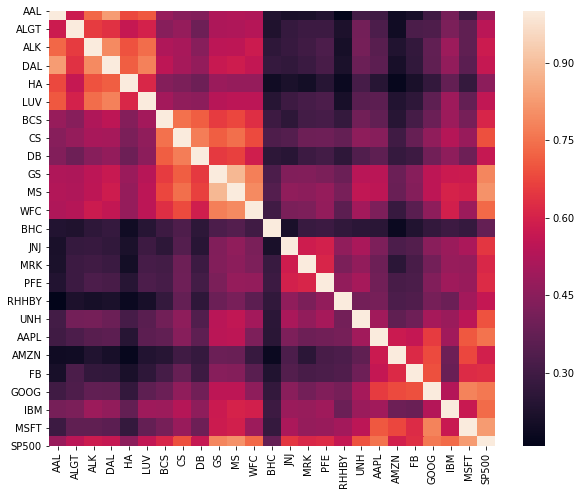

In [34]:
# Visualizing correlation matrix of daily returns 
plt.figure(figsize=(10,8))
sns.heatmap(return_stocks.corr())

(25.0, 0.0)

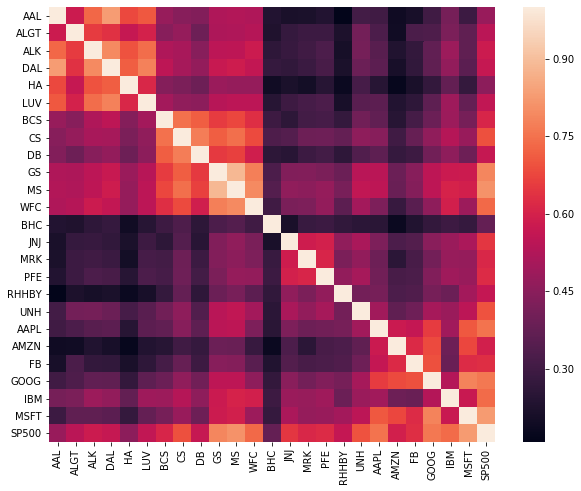

In [35]:
# Adjusting the alignment of heatmap and visualizing the correlation 
plt.figure(figsize=(10,8))
hm = sns.heatmap(return_stocks.corr())
x,y = hm.get_ylim()
hm.set_ylim(x+0.5,y-0.5)

From the above heatmap we can observe that the stocks within the same industry shows good correlation

In [36]:
# Normalized Price
nor_prize=cp_df1.copy()
nor_prize=nor_prize[['AAL','AAPL','ALGT','ALK','DAL','HA','LUV','BCS','CS','DB','GS','MS',
           'WFC','BHC','JNJ','MRK','PFE','RHHBY','UNH','AMZN','FB','GOOG','IBM','MSFT','SP500']]/nor_prize.loc['2015-10-01']
nor_prize.head()

AAL      AAPL      ALGT       ALK      AMZN       BCS  \
Date                                                                     
2015-10-01  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000   
2015-10-02  0.985459  1.007301  0.989036  0.987910  1.022699  1.025316   
2015-10-05  1.025255  1.010951  0.991192  1.008476  1.044093  1.039307   
2015-10-06  0.972704  1.015788  0.956969  0.928954  1.032186  1.035976   
2015-10-07  1.002806  1.010951  0.981007  0.946903  1.040751  1.047968   

                 BHC        CS       DAL        DB        FB      GOOG  \
Date                                                                     
2015-10-01  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000   
2015-10-02  1.015145  1.022831  0.988108  1.023379  1.012314  1.025553   
2015-10-05  0.910134  1.044417  1.034133  1.063348  1.033645  1.049371   
2015-10-06  0.924276  1.053549  0.992953  1.070890  1.020341  1.055866   
2015-10-07  0.945601  1.051059  1.012773  1.085596  1.015943  1.050827   

                  GS        HA       IBM       JNJ       LUV       MRK  \
Date                                                                     
2015-10-01  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000   
2015-10-02  1.005624  0.981804  1.006895  1.008157  0.999219  1.015597   
2015-10-05  1.026588  1.031136  1.037955  1.017066  1.023171  1.037675   
2015-10-06  1.024429  0.980590  1.036145  1.002683  0.989326  1.008710   
2015-10-07  1.035280  0.993126  1.045268  1.019427  1.007810  1.032003   

                  MS      MSFT       PFE     RHHBY     SP500       UNH  \
Date                                                                     
2015-10-01  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000   
2015-10-02  0.997778  1.021520  1.038945  1.003010  1.014315  1.019038   
2015-10-05  1.025079  1.045281  1.051508  1.006622  1.032867  1.026070   
2015-10-06  1.027302  1.047971  1.029837  1.009332  1.029161  0.995198   
2015-10-07  1.045397  1.049092  1.045540  0.979831  1.037431  0.998456   

                 WFC  
Date                  
2015-10-01  1.000000  
2015-10-02  0.996501  
2015-10-05  1.018857  
2015-10-06  1.011470  
2015-10-07  1.014580

In [37]:
# Normalized return in past 5 years stock
ret_5 = round((pd.DataFrame(nor_prize.iloc[-1])),2)
ret_5.columns=["Nor_Return"]
ret_5=ret_5.sort_values(by=['Nor_Return'],ascending=False)
ret_5.head(10)

Nor_Return
AMZN         6.05
MSFT         4.71
AAPL         4.23
FB           2.88
UNH          2.67
GOOG         2.40
SP500        1.75
MRK          1.68
JNJ          1.60
MS           1.53

In [38]:
# Visualizing Normalized Prices for each stock
nor_prize.iplot(title='Normalized Prices')

In [39]:
# Sharpe Ratio
sharpe_ratio = abs(round((((return_stocks.mean()*252)-0.0075)/(math.sqrt(252)*stock_risk)*100),2))
sharpe_ratio = pd.DataFrame(sharpe_ratio)
sharpe_ratio.columns = ["Sharpe Ratio"]
sharpe_ratio

Sharpe Ratio
AAL            0.17
ALGT           0.04
ALK            0.17
DAL            0.01
HA             0.00
LUV            0.15
BCS            0.37
CS             0.32
DB             0.32
GS             0.22
MS             0.40
WFC            0.35
BHC            0.33
JNJ            0.53
MRK            0.54
PFE            0.21
RHHBY          0.31
UNH            0.81
AAPL           1.10
AMZN           1.32
FB             0.79
GOOG           0.77
IBM            0.03
MSFT           1.23
SP500          0.64

In [40]:
# Cumulative Return in percentage
cumul_ret = cp_df1.copy()
cumul_ret = round(((((cumul_ret.loc['2020-09-30'])/(cumul_ret.loc['2015-10-01']))-1)*100),2)
cumul_ret = pd.DataFrame(cumul_ret)
cumul_ret.columns = ['Cumulative Return']
cumul_ret

Cumulative Return
AAL               -68.65
ALGT              -45.04
ALK               -54.34
DAL               -32.66
HA                -47.88
LUV                -2.37
BCS               -66.62
CS                -58.61
DB                -68.33
GS                 14.17
MS                 53.49
WFC               -54.30
BHC               -91.35
JNJ                59.79
MRK                68.02
PFE                15.26
RHHBY              28.87
UNH               167.36
AAPL              322.74
AMZN              504.69
FB                187.96
GOOG              140.41
IBM               -15.27
MSFT              371.49
SP500              74.81

In [41]:
# Investment amount
patric = 500000
peter = 1000000
percent_cum_ret = cumul_ret['Cumulative Return']*0.01

In [42]:
# creating a df to explain descriptive statistics
description_stats = pd.concat([mdr, risk_metric, annul_return, annual_risk, sharpe_ratio, cumul_ret], axis=1)
description_stats['Return after Investment for Patric'] = (patric*(1+percent_cum_ret))
description_stats["make_investment for Patric"] = description_stats['Return after Investment for Patric']>=1000000
description_stats["safe stocks for Patric"] = description_stats['Annual Risk']<=30
description_stats['Return after Investment for Peter'] = peter*(1+percent_cum_ret)
description_stats["make_investment for Peter"] = description_stats['Return after Investment for Peter']>=2000000
description_stats["safe stocks for Peter"] = description_stats['Annual Risk']<=35
description_stats

Avg Daily Return  Risk Metric  Annual Return  Annual Risk  \
AAL               -0.03         3.47          -8.47        55.08   
ALGT              -0.00         2.91          -1.19        46.19   
ALK               -0.03         2.69          -6.44        42.70   
DAL                0.00         2.65           1.05        42.07   
HA                 0.00         3.31           0.86        52.54   
LUV                0.02         2.29           6.16        36.35   
BCS               -0.05         2.51         -13.82        39.85   
CS                -0.04         2.28         -11.01        36.19   
DB                -0.05         2.77         -13.33        43.97   
GS                 0.03         1.99           7.64        31.59   
MS                 0.06         2.18          14.55        34.61   
WFC               -0.04         2.03         -10.44        32.23   
BHC               -0.09         4.46         -22.60        70.80   
JNJ                0.05         1.25          11.35        19.84   
MRK                0.05         1.41          12.88        22.38   
PFE                0.02         1.38           5.25        21.91   
RHHBY              0.03         1.35           7.38        21.43   
UNH                0.09         1.78          23.72        28.26   
AAPL               0.13         1.87          33.32        29.69   
AMZN               0.16         1.90          40.59        30.16   
FB                 0.10         2.04          26.45        32.38   
GOOG               0.08         1.65          21.02        26.19   
IBM               -0.00         1.61          -0.04        25.56   
MSFT               0.14         1.75          34.95        27.78   
SP500              0.05         1.21          13.04        19.21   

       Sharpe Ratio  Cumulative Return  Return after Investment for Patric  \
AAL            0.17             -68.65                            156750.0   
ALGT           0.04             -45.04                            274800.0   
ALK            0.17             -54.34                            228300.0   
DAL            0.01             -32.66                            336700.0   
HA             0.00             -47.88                            260600.0   
LUV            0.15              -2.37                            488150.0   
BCS            0.37             -66.62                            166900.0   
CS             0.32             -58.61                            206950.0   
DB             0.32             -68.33                            158350.0   
GS             0.22              14.17                            570850.0   
MS             0.40              53.49                            767450.0   
WFC            0.35             -54.30                            228500.0   
BHC            0.33             -91.35                             43250.0   
JNJ            0.53              59.79                            798950.0   
MRK            0.54              68.02                            840100.0   
PFE            0.21              15.26                            576300.0   
RHHBY          0.31              28.87                            644350.0   
UNH            0.81             167.36                           1336800.0   
AAPL           1.10             322.74                           2113700.0   
AMZN           1.32             504.69                           3023450.0   
FB             0.79             187.96                           1439800.0   
GOOG           0.77             140.41                           1202050.0   
IBM            0.03             -15.27                            423650.0   
MSFT           1.23             371.49                           2357450.0   
SP500          0.64              74.81                            874050.0   

       make_investment for Patric  safe stocks for Patric  \
AAL                         False                   False   
ALGT                        False                   False   
ALK                       

In [43]:
description_stats=description_stats.transpose()
description_stats

AAL    ALGT     ALK     DAL      HA  \
Avg Daily Return                     -0.03      -0   -0.03       0       0   
Risk Metric                           3.47    2.91    2.69    2.65    3.31   
Annual Return                        -8.47   -1.19   -6.44    1.05    0.86   
Annual Risk                          55.08   46.19    42.7   42.07   52.54   
Sharpe Ratio                          0.17    0.04    0.17    0.01       0   
Cumulative Return                   -68.65  -45.04  -54.34  -32.66  -47.88   
Return after Investment for Patric  156750  274800  228300  336700  260600   
make_investment for Patric           False   False   False   False   False   
safe stocks for Patric               False   False   False   False   False   
Return after Investment for Peter   313500  549600  456600  673400  521200   
make_investment for Peter            False   False   False   False   False   
safe stocks for Peter                False   False   False   False   False   

                                       LUV     BCS      CS      DB  \
Avg Daily Return                      0.02   -0.05   -0.04   -0.05   
Risk Metric                           2.29    2.51    2.28    2.77   
Annual Return                         6.16  -13.82  -11.01  -13.33   
Annual Risk                          36.35   39.85   36.19   43.97   
Sharpe Ratio                          0.15    0.37    0.32    0.32   
Cumulative Return                    -2.37  -66.62  -58.61  -68.33   
Return after Investment for Patric  488150  166900  206950  158350   
make_investment for Patric           False   False   False   False   
safe stocks for Patric               False   False   False   False   
Return after Investment for Peter   976300  333800  413900  316700   
make_investment for Peter            False   False   False   False   
safe stocks for Peter                False   False   False   False   

                                            GS          MS     WFC    BHC  \
Avg Daily Return                          0.03        0.06   -0.04  -0.09   
Risk Metric                               1.99        2.18    2.03   4.46   
Annual Return                             7.64       14.55  -10.44  -22.6   
Annual Risk                              31.59       34.61   32.23   70.8   
Sharpe Ratio                              0.22         0.4    0.35   0.33   
Cumulative Return                        14.17       53.49   -54.3 -91.35   
Return after Investment for Patric      570850      767450  228500  43250   
make_investment for Patric               False       False   False  False   
safe stocks for Patric                   False       False   False  False   
Return after Investment for Peter   1.1417e+06  1.5349e+06  457000  86500   
make_investment for Peter                False       False   False  False   
safe stocks for Peter                     True        True    True  False   

                                           JNJ         MRK         PFE  \
Avg Daily Return                          0.05        0.05        0.02   
Risk Metric                               1.25        1.41        1.38   
Annual Return                            11.35       12.88        5.25   
Annual Risk                              19.84       22.38       21.91   
Sharpe Ratio                              0.53        0.54        0.21   
Cumulative Return                        59.79       68.02       15.26   
Return after Investment for Patric      798950      840100      576300   
make_investment for Patric               False       False       False   
safe stocks for Patric                    True        True        True   
Return after Investment for Peter   1.5979e+06  1.6802e+06  1.1526e+06   
make_investment for Peter                False       False       False   
safe stocks for Peter                     True        True        True   

                                         RHHBY         UNH        AAPL  \
Avg Daily Return                          0.03        0.09        0.13   


### Reporting

In [44]:
# Creating df to suggest stocks for both clients
sotck_suggestion = description_stats.loc[['Annual Risk','Annual Return','make_investment for Patric','safe stocks for Patric',
                                          'make_investment for Peter','safe stocks for Peter']]
sotck_suggestion

AAL   ALGT    ALK    DAL     HA    LUV    BCS  \
Annual Risk                 55.08  46.19   42.7  42.07  52.54  36.35  39.85   
Annual Return               -8.47  -1.19  -6.44   1.05   0.86   6.16 -13.82   
make_investment for Patric  False  False  False  False  False  False  False   
safe stocks for Patric      False  False  False  False  False  False  False   
make_investment for Peter   False  False  False  False  False  False  False   
safe stocks for Peter       False  False  False  False  False  False  False   

                               CS     DB     GS     MS    WFC    BHC    JNJ  \
Annual Risk                 36.19  43.97  31.59  34.61  32.23   70.8  19.84   
Annual Return              -11.01 -13.33   7.64  14.55 -10.44  -22.6  11.35   
make_investment for Patric  False  False  False  False  False  False  False   
safe stocks for Patric      False  False  False  False  False  False   True   
make_investment for Peter   False  False  False  False  False  False  False   
safe stocks for Peter       False  False   True   True   True  False   True   

                              MRK    PFE  RHHBY    UNH   AAPL   AMZN     FB  \
Annual Risk                 22.38  21.91  21.43  28.26  29.69  30.16  32.38   
Annual Return               12.88   5.25   7.38  23.72  33.32  40.59  26.45   
make_investment for Patric  False  False  False   True   True   True   True   
safe stocks for Patric       True   True   True   True   True  False  False   
make_investment for Peter   False  False  False   True   True   True   True   
safe stocks for Peter        True   True   True   True   True   True   True   

                             GOOG    IBM   MSFT  SP500  
Annual Risk                 26.19  25.56  27.78  19.21  
Annual Return               21.02  -0.04  34.95  13.04  
make_investment for Patric   True  False   True  False  
safe stocks for Patric       True   True   True   True  
make_investment for Peter    True  False   True  False  
safe stocks for Peter        True   True   True   True

### Suggestions:-

Mr. Patric should invest in Google because:-
- It's annual Risk percent is low i.e 26.19%
- It' returns are as per the expectations of Mr. Patric i.e double of the invested amount

Mr. Peter can invest in Microsoft, Google, Amazon and UNH equally because:-
- It's annual Risk percent is not so high
- These stocks are among the most profitable ones
- It' returns are as per the expectations of Mr. Peter's i.e high returns

### Other observations for Mr. Peter if he invests in Microsoft, Google, Amazon and UNH equally

In [45]:
# Percent Risk Apetite for Mr. Peter if he invests 25% of his money in Microsoft, Google, Amazon and UNH equally
risk = round(((0.25*sotck_suggestion.loc['Annual Risk']['GOOG'])+(0.25*sotck_suggestion.loc['Annual Risk']['MSFT'])+
              (0.25*sotck_suggestion.loc['Annual Risk']['AMZN'])+(0.25*sotck_suggestion.loc['Annual Risk']['UNH'])),1)
print("Mr. Peter's risk apetite is",risk,'%')

Mr. Peter's risk apetite is 28.1 %


In [46]:
# Overall Percent Returns for Mr. Peter if he invests 25% of his money in Microsoft, Google, Amazon and UNH equally
ret_pet = round(((0.25*sotck_suggestion.loc['Annual Return']['GOOG'])+(0.25*sotck_suggestion.loc['Annual Return']['MSFT'])+
              (0.25*sotck_suggestion.loc['Annual Return']['AMZN'])+(0.25*sotck_suggestion.loc['Annual Return']['UNH'])),1)
print('Overall Percent Returns for Mr. Peter will be', ret_pet, "%")

Overall Percent Returns for Mr. Peter will be 30.1 %


In [47]:
# Mr. Peter's return after 5 years
total_return = ret_pet*peter # Overall Percent Returns for Mr. Peter * investment amount
print("Total return for Mr. Peter after 5 years will be", total_return)

Total return for Mr. Peter after 5 years will be 30100000.0


### Other observations for Mr. Patric if he invests in Google

In [48]:
# Percent Risk Apetite for Mr. Patric if he invests all of his money in Google    
risk = round(((sotck_suggestion.loc['Annual Risk']['GOOG'])),1)
print("Mr. Patric's risk apetite is",risk,'%')

Mr. Patric's risk apetite is 26.2 %


In [49]:
# Overall Percent Returns for Mr. Patric if he invests all of his money in Google  
ret_pat = round(((sotck_suggestion.loc['Annual Return']['GOOG'])),1)
print('Overall Percent Returns for Mr. Patric will be', ret_pat, "%")

Overall Percent Returns for Mr. Patric will be 21.0 %


In [50]:
# Mr. Patric's return after 5 years
total_return = ret_pat*patric # Overall Percent Returns for Mr. Patric * investment amount
print("Total return for Mr. Patric after 5 years will be", total_return)

Total return for Mr. Patric after 5 years will be 10500000.0
